In [1]:
from inference_utils import *
import numpy as np 

In [2]:
import matplotlib.pyplot as plt
import io
from matplotlib.pyplot import figure

def visOverlay(img_path,pxl_lvl_anom_score):
    sample_img = Image.open(img_path).convert('RGB')

    score_range = pxl_lvl_anom_score.min(), pxl_lvl_anom_score.max()
    fmap_img = pred_to_img(pxl_lvl_anom_score, score_range)
    
    # overlay
    figure(figsize=(8, 6), dpi=80)
    # plt.imshow(sample_img)
    plt.imshow(fmap_img, cmap="jet", alpha=0.5)
    plt.axis('off')
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0, transparent=True)
    # buf.seek(0)
    overlay_img = Image.open(buf)

    width1, height1 = sample_img.size
    width2, height2 = overlay_img.size
    if width1!=width2 or height1!=height2:
        overlay_img = overlay_img.resize((width1, height1))
    
    img2 = Image.new("RGB", (width1+width1, height1), "white")
    img2.paste(sample_img, (0, 0))
    img2.paste(overlay_img, (width1, 0))
    buf.close()

    return img2

/Users/rc/Documents/GitHub/my_patchcore/datasets/full_body/test/objs/S_P_M2_LW_F_LT_CL_V_N_front_0904110722.jpg
use cpu for training or inference
loading model dir: /Users/rc/Documents/GitHub/my_patchcore/TwoStageCore/exp/2022_07_06_14_51_57/models_1/Bacth_0_NumImgs_1_Z5UPENY8 sucessfully
tensor(33.4460)


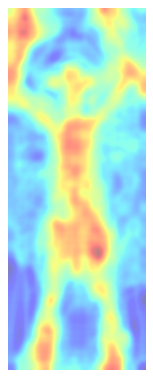

In [13]:
import random
import os

img_list = os.listdir('/Users/rc/Documents/GitHub/my_patchcore/datasets/full_body/test/objs/')
img_path = '/Users/rc/Documents/GitHub/my_patchcore/datasets/full_body/test/objs/' + random.choice(img_list)
print (img_path)
model_dir = '/Users/rc/Documents/GitHub/my_patchcore/TwoStageCore/exp/2022_07_06_14_51_57/models_1'
model_path = '/Users/rc/Documents/GitHub/my_patchcore/TwoStageCore/exp/2022_07_06_14_51_57/models_1/Bacth_0_NumImgs_1_Z5UPENY8'
results = InferenceCore(model_dir).inference_one_img(model_path, img_path)
pxl_score = results['pixel_score']
visOverlay(img_path,pxl_score)


/Users/rc/Documents/GitHub/my_patchcore/datasets/full_body/train/good/D_N_F3_KC_V_LL_CP_V_RL_back_0910151958.jpg
use cpu for training or inference
loading model dir: /Users/rc/Documents/GitHub/my_patchcore/TwoStageCore/exp/2022_07_06_14_51_57/models_1/Bacth_0_NumImgs_1_Z5UPENY8 sucessfully


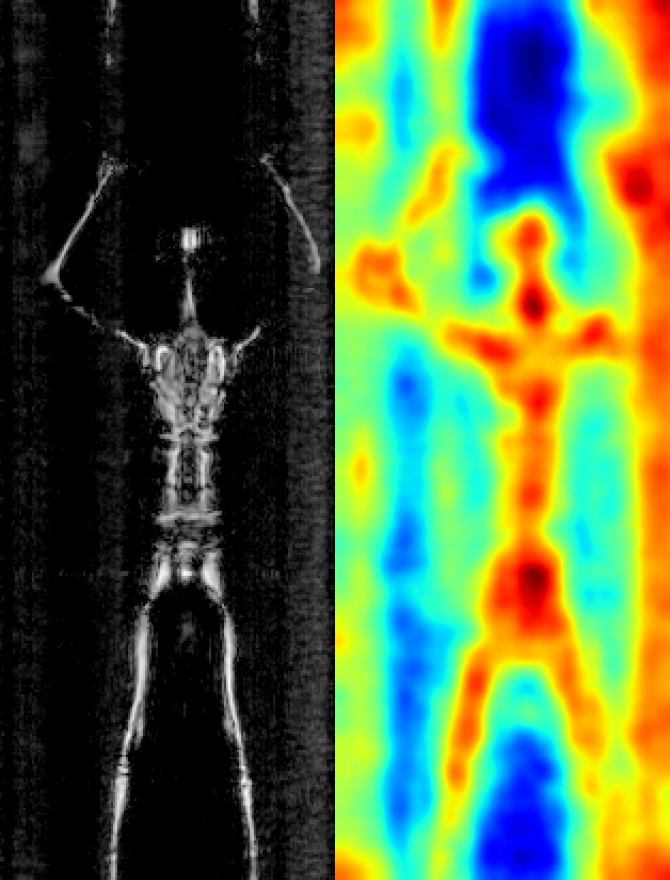

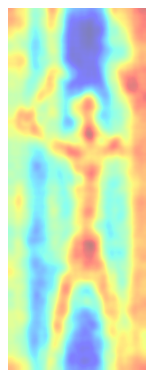

In [4]:
import random
import os

img_list = os.listdir('/Users/rc/Documents/GitHub/my_patchcore/datasets/full_body/train/good/')
img_path = '/Users/rc/Documents/GitHub/my_patchcore/datasets/full_body/train/good/' + random.choice(img_list)
print (img_path)
results = InferenceCore(model_dir).inference_one_img(model_path, img_path)
pxl_score = results['pixel_score']
visOverlay(img_path,pxl_score)